In [ ]:
import random
import time
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Definisi kelas Video
class Video:
    def __init__(self, title, category, viewers):
        self.title = title
        self.category = category
        self.viewers = viewers


In [ ]:
# Fungsi untuk generate video acak
def generate_random_videos(n):
    categories = ["music", "gaming", "film"]
    videos = []
    for i in range(1, n + 1):
        title = f"Video{i}"
        category = random.choice(categories)
        viewers = random.randint(1000, 1000000)  # Random viewer count
        videos.append(Video(title, category, viewers))
    return videos

In [ ]:
# Quick Sort (Pendekatan Rekursif)
def quick_sort(videos):
    # Base case: Jika panjang array <= 1, array sudah terurut
    if len(videos) <= 1:
        return videos


    pivot = videos[0].viewers
    less_pivot = [x for x in videos[1:] if x.viewers <= pivot]
    greater_pivot = [x for x in videos[1:] if x.viewers > pivot]

    # Rekursif untuk less_pivot dan greater_pivot, lalu gabungkan dengan pivot
    return quick_sort(less_pivot) + [videos[0]] + quick_sort(greater_pivot)


In [ ]:
# Selection Sort (Pendekatan Iteratif)
def selection_sort(videos):
    n = len(videos)
    for i in range(n - 1):
        max_idx = i
        for j in range(i + 1, n):
            if videos[j].viewers > videos[max_idx].viewers:  # Sorting descending
                max_idx = j
        videos[i], videos[max_idx] = videos[max_idx], videos[i]


In [ ]:
def categorize_videos(videos):
    music = []
    gaming = []
    film = []

    for video in videos:
        if video.category == "music":
            music.append(video)
        elif video.category == "gaming":
            gaming.append(video)
        else:
            film.append(video)

    return music, gaming, film

In [ ]:

# Fungsi untuk sorting dan mengkategorikan video (Rekursif)
def sort_and_categorize_recursive(videos):
    if len(videos) > 0:
        # Menggunakan quick_sort yang sudah diperbarui
        videos_sorted = quick_sort(videos)

        # Ambil 30 video teratas
        top30 = videos_sorted[:30]

        # Mengkategorikan video (misalnya berdasarkan kategori)
        return categorize_videos(top30)
    else:
        return [], [], []  # Kembalikan daftar kosong jika tidak ada video


# Fungsi untuk sorting dan mengkategorikan video (Iteratif)
def sort_and_categorize_iterative(videos):
    selection_sort(videos)
    top30 = videos[:30]
    return categorize_videos(top30)

In [ ]:
# Fungsi untuk menampilkan hasil
def print_results(music, gaming, film):
    print("Music:", len(music), "videos")
    for video in music:
        print(f"{video.title} ({video.viewers} viewers)")

    print("\nGaming:", len(gaming), "videos")
    for video in gaming:
        print(f"{video.title} ({video.viewers} viewers)")

    print("\nFilm:", len(film), "videos")
    for video in film:
        print(f"{video.title} ({video.viewers} viewers)")


   Input Size  Rekursif (Quick Sort)  Iteratif (Selection Sort)
0         100               0.000331                   0.002199
1         250               0.001033                   0.010922
2         400               0.001628                   0.024752
3         550               0.002300                   0.039161
4         700               0.003106                   0.060447
5         850               0.003836                   0.092226
6        1000               0.004579                   0.129788
7        1150               0.005417                   0.167599
8        1300               0.006128                   0.214294
9        1450               0.007027                   0.264361


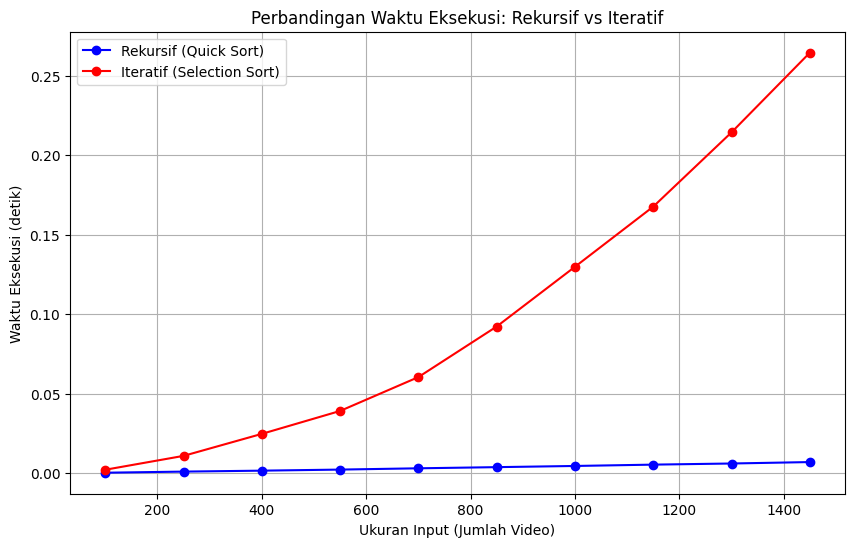

In [ ]:
# Fungsi utama
def main():
    input_sizes = [100, 250,400, 550, 700,850, 1000, 1150, 1300, 1450 ]
    runtimes_recursive = []
    runtimes_iterative = []

    for size in input_sizes:
        # Generate video hanya sekali
        videos = generate_random_videos(size)

        # Copy list video untuk rekursif
        videos_recursive = videos.copy()
        start_time = time.time()
        music_recursive, gaming_recursive, film_recursive = sort_and_categorize_recursive(videos_recursive)
        runtimes_recursive.append(time.time() - start_time)

        # Copy list video untuk iteratif
        videos_iterative = videos.copy()
        start_time = time.time()
        music_iterative, gaming_iterative, film_iterative = sort_and_categorize_iterative(videos_iterative)
        runtimes_iterative.append(time.time() - start_time)

    # Membuat DataFrame untuk tabel perbandingan
    df = pd.DataFrame({
        'Input Size': input_sizes,
        'Rekursif (Quick Sort)': runtimes_recursive,
        'Iteratif (Selection Sort)': runtimes_iterative
    })

    # Menampilkan tabel perbandingan
    print(df)

    # Plot perbandingan runtime
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, runtimes_recursive, marker='o', linestyle='-', color='b', label="Rekursif (Quick Sort)")
    plt.plot(input_sizes, runtimes_iterative, marker='o', linestyle='-', color='r', label="Iteratif (Selection Sort)")
    plt.title("Perbandingan Waktu Eksekusi: Rekursif vs Iteratif")
    plt.xlabel("Ukuran Input (Jumlah Video)")
    plt.ylabel("Waktu Eksekusi (detik)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()